In [21]:
import numpy as np
import matplotlib.pyplot as plt
import gala.coordinates as galacoord
from astropy.coordinates import SkyCoord
import pandas as pd

In [30]:
# import Gaia querey and Galstreams GD1 track
gaia_df = pd.read_csv('gaia_gd1.csv')
gd1_track = pd.read_csv('GD-1-I21_track.csv')

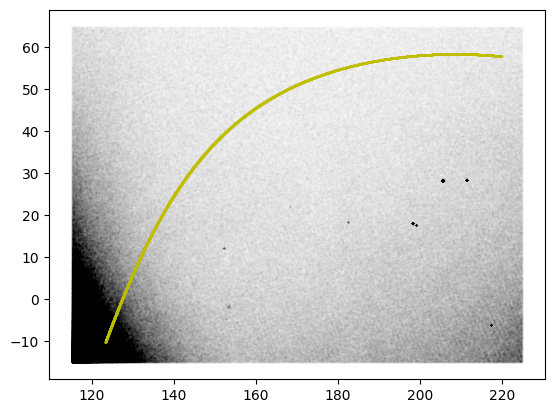

In [31]:
#Visualize the data in RA, DEC
plt.scatter(gaia_df['ra'], gaia_df['dec'], c='k', s=0.1, alpha=0.01, label='Gaia')
plt.scatter(gd1_track['ra'], gd1_track['dec'], c='y', s=0.1, label='Galstreams')

In [32]:
# Rotate into stream frame
gaia_df['phi1'] = SkyCoord(ra=gaia_df['ra'], dec=gaia_df['dec'], unit='deg').transform_to(galacoord.GD1Koposov10).phi1.deg
gaia_df['phi2'] = SkyCoord(ra=gaia_df['ra'], dec=gaia_df['dec'], unit='deg').transform_to(galacoord.GD1Koposov10).phi2.deg

In [33]:
# Rotate into stream frame
gd1_track['phi1'] = SkyCoord(ra=gd1_track['ra'], dec=gd1_track['dec'], unit='deg').transform_to(galacoord.GD1Koposov10).phi1.deg
gd1_track['phi2'] = SkyCoord(ra=gd1_track['ra'], dec=gd1_track['dec'], unit='deg').transform_to(galacoord.GD1Koposov10).phi2.deg

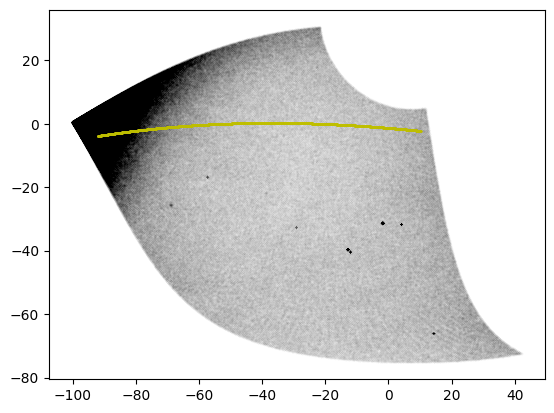

In [34]:
plt.scatter(gaia_df['phi1'], gaia_df['phi2'], c='k', s=0.1, alpha=0.01, label='Gaia')
plt.scatter(gd1_track['phi1'], gd1_track['phi2'], c='y', s=0.1, label='Galstreams')

In [35]:
from scipy.interpolate import interp1d
def betw(y_data, fit_data, delta):
    ''' Cuts delta around Galstreams track'''
    return (y_data > fit_data - delta) & (y_data < fit_data + delta)

phi_fit = interp1d(gd1_track['phi1'], gd1_track['phi2'], kind='linear', fill_value='extrapolate')
pmra_fit = interp1d(gd1_track['phi1'], gd1_track['pmra'], kind='linear', fill_value='extrapolate')
pmdec_fit = interp1d(gd1_track['phi1'], gd1_track['pmdec'], kind='linear', fill_value='extrapolate')
#vrad_fit = interp1d(galstream_phi1, gd1_track['ra']dial_velocity, kind='linear', fill_value='extrapolate') # Uncomment if you have lots of radial velocities for the stream

gaia_cut_phi2 = betw(gaia_df['phi2'], phi_fit(gaia_df['phi1']), 5)
gaia_cut_pmra = betw(gaia_df['pmra'], pmra_fit(gaia_df['phi1']), 0.5)
gaia_cut_pmdec = betw(gaia_df['pmdec'], pmdec_fit(gaia_df['phi1']), 0.5)

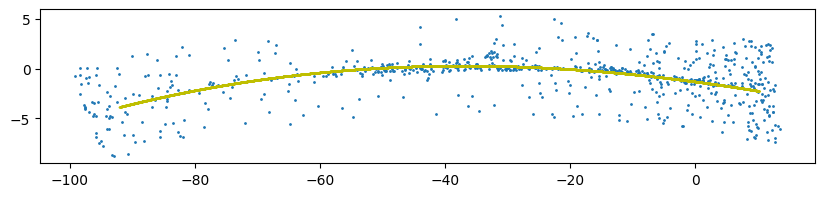

In [36]:
# Visualize remaining candidates
fig, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(gaia_df['phi1'][gaia_cut_phi2 & gaia_cut_pmra & gaia_cut_pmdec], gaia_df['phi2'][gaia_cut_phi2 & gaia_cut_pmra & gaia_cut_pmdec], s=1, alpha=1, label='Gaia')
ax.scatter(gd1_track['phi1'], gd1_track['phi2'], c='y', s=0.1, label='Galstreams')

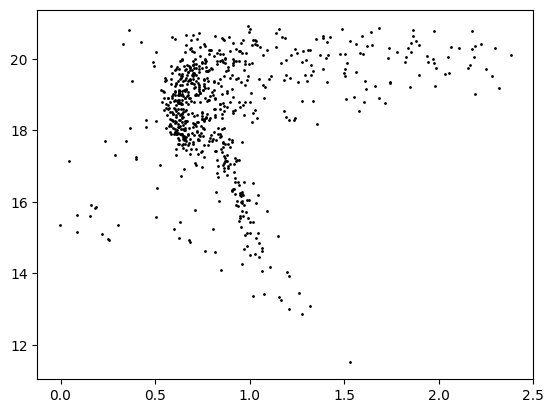

In [37]:
## Could consider an isochrone cut
plt.scatter(gaia_df['bp_rp'][gaia_cut_phi2 & gaia_cut_pmra & gaia_cut_pmdec], gaia_df['phot_g_mean_mag'][gaia_cut_phi2 & gaia_cut_pmra & gaia_cut_pmdec], c='k', s=1, alpha=1, label='Gaia')